In [141]:
import torch
import torch.nn as nn
from torch.optim import SGD

import numpy as np
from numpy import dot
import matplotlib.pyplot as plt

In [142]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.hidden = nn.Linear(hidden_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x=self.input_layer(x)
        x=x.relu()
        x=self.hidden(x)
        x=x.relu()
        x=self.output_layer(x)
        return x
    
def ReLU_glorot_init(model):
    for name, param in model.named_parameters():
        
        if name.endswith(".bias"):
            param.data.fill_(0)
        else:
            nn.init.xavier_normal_(param)

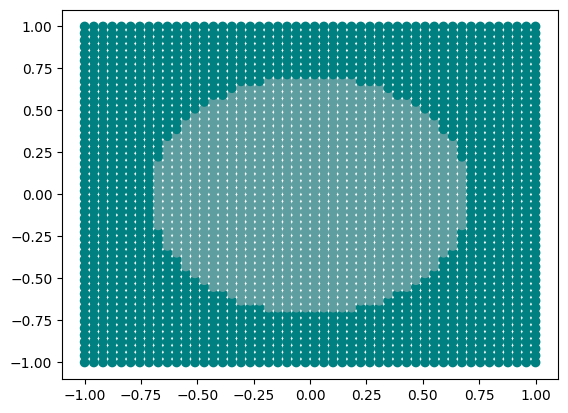

In [143]:
RES=50
X=[]
for x_1 in np.linspace(-1,1,RES):
    for x_2 in np.linspace(-1,1,RES):
        X.append([x_1,x_2])
X=np.array(X)

encode_inputs=lambda x: 1 if x[0]**2+x[1]**2<0.5 else 0
Y=np.array([encode_inputs(x) for x in X])

X=torch.from_numpy(X).float()
Y=torch.from_numpy(Y).float()


colors=np.full(len(Y), 'cadetblue')
colors[Y==0]='teal'

plt.scatter(X[:,0],X[:,1],c=colors)

In [144]:
model = NeuralNet(2,256,2)
ReLU_glorot_init(model)

def next_batch(inputs, targets, batchSize):
	for i in range(0, inputs.shape[0], batchSize):
		yield (inputs[i:i + batchSize], targets[i:i + batchSize])

BATCH_SIZE = 100
EPOCHS = 200
LR = 0.01

opt = SGD(model.parameters(), lr=LR)
lossFunc = nn.CrossEntropyLoss()

In [148]:
def training():
	trainLoss = 0
	samples = 0
	model.train()
	for batchX, batchY in next_batch(X, Y, BATCH_SIZE):
		predictions = model(batchX)
		loss = lossFunc(predictions, batchY.long())
		opt.zero_grad()
		loss.backward()
		opt.step()
		samples += len(batchY)
		trainLoss += loss.item()*len(batchY)
	return trainLoss/samples

In [149]:
for n in range(EPOCHS):
    l=training()
    print('Epoch {}: Loss {:.3f}'.format(n+1,l))

grads=[]
for x,y in zip(X,Y):
    predictions = model(x)
    loss = lossFunc(predictions, y.long())
    opt.zero_grad()
    loss.backward()
    gradient=[]
    gradient+=torch.flatten(model.input_layer.weight.grad).tolist()
    gradient+=model.input_layer.bias.grad.tolist()
    gradient+=torch.flatten(model.hidden.weight.grad).tolist()
    gradient+=model.hidden.bias.grad.tolist()
    gradient+=torch.flatten(model.output_layer.weight.grad).tolist()
    gradient+=model.output_layer.bias.grad.tolist()
    gradient=np.array(gradient)
    gradient=gradient/np.linalg.norm(gradient)
    grads.append(gradient)


dot_matrix=[]
for i,x1 in enumerate(X):
    avg_dot=0
    samples=0
    for j,x2 in enumerate(X):
        if np.linalg.norm(x1-x2)<0.05 and i!=j:        
            avg_dot+=np.dot(grads[i],grads[j])
            samples+=1
    avg_dot=avg_dot/samples
    dot_matrix.append(avg_dot)

Epoch 1: Loss 0.675
Epoch 2: Loss 0.656
Epoch 3: Loss 0.643
Epoch 4: Loss 0.634
Epoch 5: Loss 0.627
Epoch 6: Loss 0.621
Epoch 7: Loss 0.616
Epoch 8: Loss 0.611
Epoch 9: Loss 0.606
Epoch 10: Loss 0.602
Epoch 11: Loss 0.597
Epoch 12: Loss 0.593
Epoch 13: Loss 0.589
Epoch 14: Loss 0.584
Epoch 15: Loss 0.580
Epoch 16: Loss 0.575
Epoch 17: Loss 0.571
Epoch 18: Loss 0.566
Epoch 19: Loss 0.562
Epoch 20: Loss 0.557
Epoch 21: Loss 0.553
Epoch 22: Loss 0.548
Epoch 23: Loss 0.543
Epoch 24: Loss 0.538
Epoch 25: Loss 0.534
Epoch 26: Loss 0.529
Epoch 27: Loss 0.524
Epoch 28: Loss 0.519
Epoch 29: Loss 0.514
Epoch 30: Loss 0.509
Epoch 31: Loss 0.504
Epoch 32: Loss 0.498
Epoch 33: Loss 0.493
Epoch 34: Loss 0.488
Epoch 35: Loss 0.482
Epoch 36: Loss 0.477
Epoch 37: Loss 0.472
Epoch 38: Loss 0.466
Epoch 39: Loss 0.461
Epoch 40: Loss 0.456
Epoch 41: Loss 0.450
Epoch 42: Loss 0.445
Epoch 43: Loss 0.439
Epoch 44: Loss 0.434
Epoch 45: Loss 0.429
Epoch 46: Loss 0.423
Epoch 47: Loss 0.418
Epoch 48: Loss 0.413
E

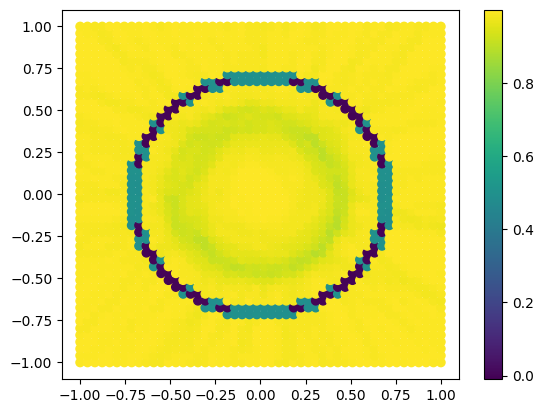

In [150]:
fig, axs = plt.subplots(1,1)

pcm = axs.scatter(X[:,0], X[:,1],c=dot_matrix)

fig.colorbar(pcm, ax=axs)